<div style="text-align: center;">
    <h2 style="color: #007BFF;">DEP Task 3 : Sentiment Analysis</h2>
</div>

<div style="text-align: left;">
   <h2 style="color: #007BFF;">Connect with Me</h2>
</div>
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <a href="https://www.linkedin.com/in/zeeshan--ahmed" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn">
    </a>
    <br>
    <a href="https://www.kaggle.com/zeeshanahmad124586" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle" alt="Kaggle">
    </a>
    <br>
    <a href="https://github.com/zeeshanAhmed2798" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub">
    </a>
</div>


- I get this api form RapidApi
link: https://rapidapi.com/omarmhaimdat/api/twitter154/playground/apiendpoint_b06c6575-9ee4-4bea-baa1-7902044bed05

## Fetch Data From API

In [62]:
import requests

url = 'https://trustpilot-company-and-reviews-data.p.rapidapi.com/consumer-reviews'
headers = {
    'x-rapidapi-host': 'trustpilot-company-and-reviews-data.p.rapidapi.com',
    'x-rapidapi-key': '044cf58e69mshc7d44d528d9a9e2p1e4d2ejsn593eb53d2805'
}
params = {
    'consumer_id': '5fafc38b32ed7f0019d27bc5',
    'page': '1',
    'locale': 'en-US'
}

response = requests.get(url, headers=headers, params=params)
print(response.json())
data = response.json()


{'status': 'OK', 'request_id': '7511da87-c6ab-4dbd-825d-406b56a70a9f', 'parameters': {'consumer_id': '5fafc38b32ed7f0019d27bc5', 'locale': 'en-US', 'page': '1'}, 'data': {'reviews': [{'review_id': '657e02ae6cb9c29acefb0176', 'review_title': 'Good service!', 'review_text': 'Good service!', 'review_rating': 5, 'review_is_verified': False, 'review_is_pending': False, 'review_likes': 0, 'review_language': 'en', 'review_time': '2023-12-16T22:03:59.000Z', 'review_experienced_time': '2023-12-16T00:00:00.000Z', 'consumer_id': '5fafc38b32ed7f0019d27bc5', 'consumer_name': 'Jan Kristensson', 'consumer_image': 'https://user-images.trustpilot.com/5fafc38b32ed7f0019d27bc5/73x73.png', 'consumer_review_count': 26, 'consumer_country': 'SE', 'consumer_is_verified': False, 'consumer_review_count_same_domain': 1, 'company_id': '5b6480ea4a7a1a00011d9d72', 'company_domain': 'besttransport.se', 'company_name': 'Best Transport'}, {'review_id': '6533f34b097215eab948ffa3', 'review_title': 'Excellent service', '

In [63]:
reviews = data['data']['reviews']
df_reviews = pd.DataFrame(reviews)

## Data Exploration

In [93]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   review_id                          20 non-null     object
 1   review_title                       20 non-null     object
 2   review_text                        20 non-null     object
 3   review_rating                      20 non-null     int64 
 4   review_is_verified                 20 non-null     bool  
 5   review_is_pending                  20 non-null     bool  
 6   review_likes                       20 non-null     int64 
 7   review_language                    20 non-null     object
 8   review_time                        20 non-null     object
 9   review_experienced_time            7 non-null      object
 10  consumer_id                        20 non-null     object
 11  consumer_name                      20 non-null     object
 12  consumer_i

Too many columns so I read it in Excel and then choose which columns I need,

In [64]:
df_reviews.to_csv("review.csv")

## Clean

In [69]:
columns_to_keep = [
    'company_id', 'company_domain', 'company_name', 'review_title',
    'review_id', 'reply_text', 'review_text', 'review_rating'
]
df = df_reviews[columns_to_keep]


In [70]:
df.head()

,company_id,company_domain,company_name,review_title,review_id,reply_text,review_text,review_rating
0,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Good service!,657e02ae6cb9c29acefb0176,NaN,Good service!,5
1,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Excellent service,6533f34b097215eab948ffa3,NaN,Excellent service. Fast delivery!,5
2,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Excellent service,6525a2a50af6d4bf2bc1c081,NaN,Excellent service. Nice delivery man.,5
3,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Excellent in every aspect!,64ce4e9281908b15d37067d0,NaN,Excellent in every aspect!,5
4,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Mycket god service,64cc01662076edff50fcc4ed,NaN,Mycket god service,5


- Calculate sentiments

In [80]:
def categorize_sentiment(rating):
    if rating >= 5:
        return 'positive'
    elif rating == 4:
        return 'neutral'
    else:
        return 'negative'

In [81]:
df['sentiment'] = df['review_rating'].apply(categorize_sentiment)

<ipython-input-81-44633fc7f57e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['review_rating'].apply(categorize_sentiment)


In [82]:
df.head()

,company_id,company_domain,company_name,review_title,review_id,reply_text,review_text,review_rating,sentiment,sentiment_score
0,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Good service!,657e02ae6cb9c29acefb0176,NaN,Good service!,5,positive,0.4926
1,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Excellent service,6533f34b097215eab948ffa3,NaN,Excellent service. Fast delivery!,5,positive,0.6114
2,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Excellent service,6525a2a50af6d4bf2bc1c081,NaN,Excellent service. Nice delivery man.,5,positive,0.7579
3,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Excellent in every aspect!,64ce4e9281908b15d37067d0,NaN,Excellent in every aspect!,5,positive,0.6114
4,5b6480ea4a7a1a00011d9d72,besttransport.se,Best Transport,Mycket god service,64cc01662076edff50fcc4ed,NaN,Mycket god service,5,positive,0.2732


- Initialize SentimentIntensityAnalyzer To analyze Intensity

In [83]:
sia = SentimentIntensityAnalyzer()

- Add sentiment scores

In [84]:
df['sentiment_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

<ipython-input-84-d2e465272648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


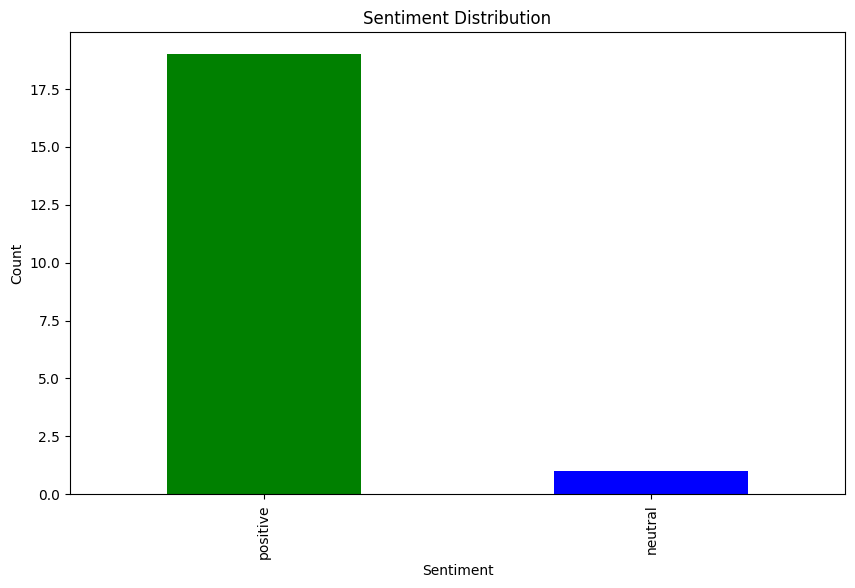

In [85]:
plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [86]:
X = df['review_text']
y = df['sentiment']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


-  pipeline for text classification

In [88]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [89]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [90]:
y_pred = model.predict(X_test)

- classification report

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    positive       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

